### Problema

Em uma trasnportadora com caminhoes de espaço interno do baú de 3m³ temos que alocar produtos que em sua soma total ocupam 4.79m³, qual melhor alocação de produtos para gerar o maior lucro, tendo em mente ocupar os caminhão com os produtos com maior lucro?

In [78]:
from random import random
import matplotlib.pyplot as plt

In [79]:
class Produto():
    def __init__(self, nome, espaco, valor):
        self.nome = nome
        self.espaco = espaco
        self.valor = valor       

In [80]:
lista_produtos = []
lista_produtos.append(Produto('Geladeira Dako', 0.751, 999.90))
lista_produtos.append(Produto('Iphone 6', 0.0000899, 2911.12))
lista_produtos.append(Produto('TV 55', 0.400, 4346.99))
lista_produtos.append(Produto('TV 50', 0.290, 3999.90))
lista_produtos.append(Produto('TV 42', 0.200, 2999.90))
lista_produtos.append(Produto('Notebook Dell', 0.00350, 2499.90))
lista_produtos.append(Produto('Ventilador Panasonic', 0.496, 199.90))
lista_produtos.append(Produto('Microondas Eletrolux', 0.0424, 308.66))
lista_produtos.append(Produto('Microondas LG', 0.0544, 429.90))
lista_produtos.append(Produto('Microondas Panasonic', 0.0319, 299.29))
lista_produtos.append(Produto('Geladeira Brastemp', 0.635, 849.00))
lista_produtos.append(Produto('Geladeira Consul', 0.870, 1199.89))
lista_produtos.append(Produto('Notebook Lenovo', 0.498, 1999.90))
lista_produtos.append(Produto('Notebook Asus', 0.527, 3999.90))

In [81]:
for produto in lista_produtos:
    print(produto)

In [82]:
class Individuo():
    def __init__(self, espacos, valores, limite_esoacos, geracao=0):
        self.espacos = espacos
        self.valores = valores
        self.limite_espacos = limite_esoacos
        self.geracao = geracao
        self.nota_avaliacao = 0
        self.espaco_usado = 0
        self.cromossomo = []

        for i in range(len(espacos)):
            if random() < 0.5:
                self.cromossomo.append('0')
            else:
                self.cromossomo.append('1')
    
    def avaliacao(self):
        nota = 0 
        soma_espacos = 0
        for i in range(len(self.cromossomo)):
            if self.cromossomo[i] == '1':
                nota += self.valores[i]
                soma_espacos += self.espacos[i]
        
        if soma_espacos > self.limite_espacos:
            nota = 1

        self.nota_avaliacao = nota
        self.espaco_usado = soma_espacos
    
    def crossover(self, outro_individuo):
        corte = round(random() * len(self.cromossomo))
        
        filho1 = outro_individuo.cromossomo[0:corte] + self.cromossomo[corte::]
        filho2 = self.cromossomo[0:corte] + outro_individuo.cromossomo[corte::]

        filhos = [Individuo(self.espacos, self.valores, self.limite_espacos, self.geracao + 1),
                  Individuo(self.espacos, self.valores, self.limite_espacos, self.geracao + 1)]

        filhos[0].cromossomo = filho1
        filhos[1].cromossomo = filho2
        
        return filhos

    def mutacao(self, taxa_mutacao):
        #print('Antes %s' % self.cromossomo)
        for i in range(len(self.cromossomo)):
            if random() < taxa_mutacao:
                if self.cromossomo[i] =='1':
                    self.cromossomo[i] = '0'
                else:
                    self.cromossomo[i] = '1'
        
        #print('Depois %s' % self.cromossomo)
        return self


In [83]:
class AlgoritimoGenetico():
    def __init__(self, tamanho_populacao):
        self.tamanho_populacao = tamanho_populacao
        self.populacao = []
        self.geracao = 0
        self.melhor_solucao = 0
        
        # visualização do grafico
        self.lista_solucoes = []

    def inicializa_populacao(self, espacos, valores, limite_espacos):
        for i in range(self.tamanho_populacao):
            self.populacao.append(Individuo(espacos, valores, limite_espacos))
        self.melhor_solucao = self.populacao[0]
    
    def ordena_populacao(self):
        self.populacao = sorted(self.populacao, 
                                key = lambda populacao: populacao.nota_avaliacao, 
                                reverse=True)

    def melhor_individuo(self, individuo):
        if individuo.nota_avaliacao > self.melhor_solucao.nota_avaliacao:
            self.melhor_solucao = individuo
    
    def soma_avaliacoes(self):
        soma = 0 
        for individuo in self.populacao:
            soma += individuo.nota_avaliacao
        
        return soma
    
    def seleciona_pai(self, soma_avaliacao):
        pai = -1
        valor_sorteado = random()*soma_avaliacao
        soma = 0 
        i = 0 
        while i < len(self.populacao) and soma < valor_sorteado:
            soma += self.populacao[i].nota_avaliacao
            pai += 1 
            i += 1
        
        return pai
    
    def visualiza_geracao(self):
        melhor = self.populacao[0]
        print('G:%s  -> Valor %s Espaço: %s Cromossomo: %s ' % (self.populacao[0].geracao,
                                                                melhor.nota_avaliacao,
                                                                melhor.espaco_usado, 
                                                                melhor.cromossomo))
        
    def resolver(self, taxa_mutacao, numero_geracoes, espacos, valores, limite_espacos):
        self.inicializa_populacao(espacos, valores, limite_espacos)

        for individuo in self.populacao:
            individuo.avaliacao()
        
        self.ordena_populacao()

        self.melhor_solucao = self.populacao[0]
        self.lista_solucoes.append(self.melhor_solucao.nota_avaliacao)

        self.visualiza_geracao()

        for geracao in range(numero_geracoes):
            soma_avaliacao = self.soma_avaliacoes()
            nova_populacao = []

            for individuo_gerados in range(0, self.tamanho_populacao, 2):
                pai1 = self.seleciona_pai(soma_avaliacao)
                pai2 = self.seleciona_pai(soma_avaliacao)

                filhos = self.populacao[pai1].crossover(self.populacao[pai2])

                nova_populacao.append(filhos[0].mutacao(taxa_mutacao))
                nova_populacao.append(filhos[1].mutacao(taxa_mutacao))

            self.populacao = list(nova_populacao)
            
            for individuo in self.populacao:
                individuo.avaliacao()

            self.ordena_populacao()

            self.visualiza_geracao()

            melhor = self.populacao[0]
            self.lista_solucoes.append(melhor.nota_avaliacao)
            self.melhor_individuo(melhor)

        print('\n Melhor Solução --> G: %s Valor: %s Espaço: %s Cromossomo: %s' % 
                (self.melhor_solucao.geracao,
                 self.melhor_solucao.nota_avaliacao,
                 self.melhor_solucao.espaco_usado,
                 self.melhor_solucao.cromossomo))
        
        return melhor.cromossomo


In [84]:
espacos = []
valores = []
nomes = []
for produto in lista_produtos:
    espacos.append(produto.espaco)
    valores.append(produto.valor)
    nomes.append(produto.nome)

In [85]:
print(espacos), print(valores), print(nomes)

[0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527]
[999.9, 2911.12, 4346.99, 3999.9, 2999.9, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.9]
['Geladeira Dako', 'Iphone 6', 'TV 55', 'TV 50', 'TV 42', 'Notebook Dell', 'Ventilador Panasonic', 'Microondas Eletrolux', 'Microondas LG', 'Microondas Panasonic', 'Geladeira Brastemp', 'Geladeira Consul', 'Notebook Lenovo', 'Notebook Asus']


(None, None, None)

In [86]:
limite = 3

individuo1 = Individuo(espacos, valores, limite)

In [87]:
print('Espaços = %s' % str(individuo1.espacos))
print('Valores = %s' % str(individuo1.valores))
print('Cromossomo = %s' % str(individuo1.cromossomo))

Espaços = [0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527]
Valores = [999.9, 2911.12, 4346.99, 3999.9, 2999.9, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.9]
Cromossomo = ['0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1']


In [88]:
print('Componentes da carga')
for i in range(len(lista_produtos)):
    if individuo1.cromossomo[i] == '1':
        print('Nome: %s R$ %s ' % (lista_produtos[i].nome, lista_produtos[i].valor))

Componentes da carga
Nome: TV 50 R$ 3999.9 
Nome: Notebook Dell R$ 2499.9 
Nome: Ventilador Panasonic R$ 199.9 
Nome: Microondas Eletrolux R$ 308.66 
Nome: Notebook Lenovo R$ 1999.9 
Nome: Notebook Asus R$ 3999.9 


In [89]:
individuo1.avaliacao()

In [90]:
print('Nota: %s ' % (individuo1.nota_avaliacao))
print('Espaço usado: %s ' % (individuo1.espaco_usado))

Nota: 13008.16 
Espaço usado: 1.8569 


In [91]:
print('\nIndividuo 1')
print('Componentes da carga')
for i in range(len(lista_produtos)):
    if individuo1.cromossomo[i] == '1':
        print('Nome: %s R$ %s ' % (lista_produtos[i].nome, lista_produtos[i].valor))
individuo1.avaliacao()
print('Nota: %s ' % (individuo1.nota_avaliacao))
print('Espaço usado: %s ' % (individuo1.espaco_usado))


Individuo 1
Componentes da carga
Nome: TV 50 R$ 3999.9 
Nome: Notebook Dell R$ 2499.9 
Nome: Ventilador Panasonic R$ 199.9 
Nome: Microondas Eletrolux R$ 308.66 
Nome: Notebook Lenovo R$ 1999.9 
Nome: Notebook Asus R$ 3999.9 
Nota: 13008.16 
Espaço usado: 1.8569 


In [92]:
individuo2 = Individuo(espacos, valores, limite)

In [93]:
individuo2.avaliacao()

In [94]:
print('\nIndividuo 2')
print('Componentes da carga')
for i in range(len(lista_produtos)):
    if individuo2.cromossomo[i] == '1':
        print('Nome: %s R$ %s ' % (lista_produtos[i].nome, lista_produtos[i].valor))
individuo1.avaliacao()
print('Nota: %s ' % (individuo2.nota_avaliacao))
print('Espaço usado: %s ' % (individuo2.espaco_usado))


Individuo 2
Componentes da carga
Nome: Iphone 6 R$ 2911.12 
Nome: Ventilador Panasonic R$ 199.9 
Nome: Microondas Eletrolux R$ 308.66 
Nome: Microondas LG R$ 429.9 
Nome: Geladeira Brastemp R$ 849.0 
Nome: Notebook Asus R$ 3999.9 
Nota: 8698.48 
Espaço usado: 1.7548899000000002 


In [95]:
individuo1.mutacao(0.05)
individuo2.mutacao(0.05)

In [96]:
tamanho_populacao = 20
ag = AlgoritimoGenetico(tamanho_populacao)
ag.inicializa_populacao(espacos, valores, limite)

for individuo in ag.populacao:
    individuo.avaliacao()

ag.ordena_populacao()

for i in range(ag.tamanho_populacao):
    print('*** Individuo %s*** \n' % i,
          'Espaços = %s \n' % str(ag.populacao[i].espacos), 
          'Valores = %s \n' % str(ag.populacao[i].valores),
          'Cromossomo = %s \n' % str(ag.populacao[i].cromossomo),
          'Nota = %s \n' % str(ag.populacao[i].nota_avaliacao)
           )

*** Individuo 0*** 
 Espaços = [0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
 Valores = [999.9, 2911.12, 4346.99, 3999.9, 2999.9, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.9] 
 Cromossomo = ['0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1'] 
 Nota = 24345.170000000006 

*** Individuo 1*** 
 Espaços = [0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
 Valores = [999.9, 2911.12, 4346.99, 3999.9, 2999.9, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.9] 
 Cromossomo = ['0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1'] 
 Nota = 21004.15 

*** Individuo 2*** 
 Espaços = [0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
 Valores = [999.9, 2911.12, 4346.99, 3999.9, 2999.9, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.9] 
 Cromossomo 

In [97]:
tamanho_populacao = 20
ag = AlgoritimoGenetico(tamanho_populacao)
ag.inicializa_populacao(espacos, valores, limite)

for individuo in ag.populacao:
    individuo.avaliacao()

ag.ordena_populacao()
ag.melhor_individuo(ag.populacao[0])
print('Melhor Solução para o probema: %s' % ag.melhor_solucao.cromossomo,
      'Nota =  %s' % ag.melhor_solucao.nota_avaliacao
     )

Melhor Solução para o probema: ['1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1'] Nota =  19066.37


In [98]:
tamanho_populacao = 20
ag = AlgoritimoGenetico(tamanho_populacao)
ag.inicializa_populacao(espacos, valores, limite)

for individuo in ag.populacao:
    individuo.avaliacao()

ag.ordena_populacao()
ag.melhor_individuo(ag.populacao[0])
soma = ag.soma_avaliacoes()

print('Soma =  %s' % soma)

Soma =  244642.97000000006


In [99]:
tamanho_populacao = 4
ag = AlgoritimoGenetico(tamanho_populacao)
ag.inicializa_populacao(espacos, valores, limite)

for individuo in ag.populacao:
    individuo.avaliacao()

ag.ordena_populacao()
ag.melhor_individuo(ag.populacao[0])
soma = ag.soma_avaliacoes()
nova_populacao = []
probabilidade_mutacao = 0.01

for individuo_gerados in range(0, ag.tamanho_populacao, 2):
    pai1 = ag.seleciona_pai(soma)
    pai2 = ag.seleciona_pai(soma)

    filhos = ag.populacao[pai1].crossover(ag.populacao[pai2])
    
    nova_populacao.append(filhos[0].mutacao(probabilidade_mutacao))
    nova_populacao.append(filhos[1].mutacao(probabilidade_mutacao))

ag.populacao = list(nova_populacao)

for individuo in ag.populacao:
    individuo.avaliacao()

ag.ordena_populacao()
ag.melhor_individuo(ag.populacao[0])
soma = ag.soma_avaliacoes()

print('Melhor: %s' % ag.melhor_solucao.cromossomo, 
       'Valor: %s \n' % ag.melhor_solucao.nota_avaliacao)

Melhor: ['0', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1'] Valor: 17149.28 



In [100]:
# definição da função final

G:0  -> Valor 18186.9 Espaço: 2.2973899 Cromossomo: ['0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1'] 
G:1  -> Valor 17045.36 Espaço: 2.7288899 Cromossomo: ['0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1'] 
G:2  -> Valor 17886.79 Espaço: 2.8808899000000006 Cromossomo: ['0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1'] 
G:3  -> Valor 19545.26 Espaço: 2.7323899000000003 Cromossomo: ['0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1'] 
G:4  -> Valor 17575.78 Espaço: 1.8048000000000002 Cromossomo: ['0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1'] 
G:5  -> Valor 18424.78 Espaço: 2.4398 Cromossomo: ['0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1'] 
G:6  -> Valor 18424.78 Espaço: 2.4398 Cromossomo: ['0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1'] 
G:7  -> Valor 20496.170000000002 Espaço: 2.4763899 Cromossomo: ['1', '1', '1', '0', '1', '1', '0', '1', '

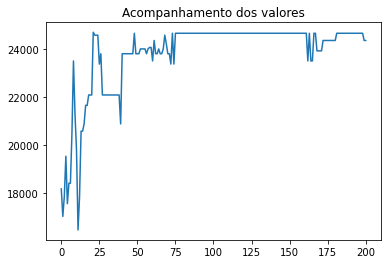

In [101]:
tamanho_populacao = 20
limite = 3
taxa_mutacao = 0.01
numero_geracoes = 200


ag = AlgoritimoGenetico(tamanho_populacao)
resultado = ag.resolver(taxa_mutacao, numero_geracoes, espacos, valores, limite)

for i in range(len(lista_produtos)):
    if resultado[i] == '1':
        print('Nome: %s R$ %s' % (lista_produtos[i].nome, 
                                  lista_produtos[i].valor))

#for valor in ag.lista_solucoes:
#    print(valor)

plt.plot(ag.lista_solucoes)
plt.title('Acompanhamento dos valores')
plt.show();